In [34]:
pip install nltk

In [35]:
#불용어 다운로드
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re


def preprocess_text(text):
    # 텍스트 정규화
    text = re.sub(r"I'm", "I am", text)

    # 특수문자 및 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)

    # 소문자로 변환
    text = text.lower()

    # 불용어 제거(나중에 추가하기)
    additional_stopwords = ['year', 'would', 'se', 'iii']
    stop_words = set(stopwords.words('english') + additional_stopwords)
    words = text.split()
    filtered_text = [word for word in words if word not in stop_words]

    # 철자 2개 이하의 단어와 숫자 제거
    filtered_text = [word for word in filtered_text if len(word) > 2 and not word.isdigit()]

    return filtered_text

# 파일 경로
file_path = '/content/drive/MyDrive/Colab Notebooks/fomc 회의록/merged_2018~2023.txt'

# 파일 읽기
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# 텍스트 전처리 및 토큰화
filtered_text = preprocess_text(text)

# 결과를 데이터프레임으로 변환
df = pd.DataFrame({'Token': filtered_text})

# 데이터프레임 출력
print(df.head)  # 처음 10개의 행 출력

# 결과를 CSV 파일로 저장
df.to_csv('/content/drive/MyDrive/Colab Notebooks/fomc 회의록/filtered_tokens_after_preprocess.csv', index=False)


<bound method NDFrame.head of              Token
0            steve
1          liesman
2         chairman
3            right
4       microphone
...            ...
478399        page
478400   10federal
478401        open
478402      market
478403   committee

[478404 rows x 1 columns]>


In [42]:
#5-gram

from nltk.util import ngrams

def generate_ngrams(text, n):
    words = text.split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]

# 텍스트 파일 불러오기
file_path = '/content/drive/MyDrive/Colab Notebooks/fomc 회의록/filtered_text5.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# n-gram 생성 (예: 5-gram)
five_grams = generate_ngrams(text, 5)

# 결과 출력
print("5-Grams:")
for five_gram in five_grams:
    print(five_gram)

# 저장할 파일 경로
output_file_path_five_grams = '/content/drive/MyDrive/Colab Notebooks/fomc 회의록/five_grams.txt'

# five_grams를 텍스트 파일에 저장
with open(output_file_path_five_grams, 'w', encoding='utf-8') as output_file:
    output_file.write('\n'.join(five_grams))

print(f'5-Grams saved to {output_file_path_five_grams}')


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
transitioning operational approach designed maintain
operational approach designed maintain ample
approach designed maintain ample reserve
designed maintain ample reserve levels
maintain ample reserve levels without
ample reserve levels without active
reserve levels without active use
levels without active use repo
without active use repo operations
active use repo operations supply
use repo operations supply reserves
repo operations supply reserves plan
operations supply reserves plan repo
supply reserves plan repo operations
reserves plan repo operations maintained
plan repo operations maintained least
repo operations maintained least april
operations maintained least april ensure
maintained least april ensure ample
least april ensure ample reserve
april ensure ample reserve conditions
ensure ample reserve conditions however
ample reserve conditions however desk
reserve conditions however desk continue
conditions however desk continue gradual
howev

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
goal participants indicated recent job
participants indicated recent job gains
indicated recent job gains strong
recent job gains strong weaker
job gains strong weaker expected
gains strong weaker expected number
strong weaker expected number participants
weaker expected number participants noted
expected number participants noted labor
number participants noted labor market
participants noted labor market recovery
noted labor market recovery continued
labor market recovery continued uneven
market recovery continued uneven across
recovery continued uneven across demo
continued uneven across demo graphic
uneven across demo graphic income
across demo graphic income groups
demo graphic income groups across
graphic income groups across sectors
income groups across sectors participants
groups across sectors participants noted
across sectors participants noted district
sectors participants noted district contacts
participants noted district contacts ported

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
insufficient tightening committee policy actions
tightening committee policy actions discussion
committee policy actions discussion monetary
policy actions discussion monetary policy
actions discussion monetary policy meeting
discussion monetary policy meeting members
monetary policy meeting members agreed
policy meeting members agreed economic
meeting members agreed economic activity
members agreed economic activity panding
agreed economic activity panding moderate
economic activity panding moderate pace
activity panding moderate pace also
panding moderate pace also concurred
moderate pace also concurred job
pace also concurred job gains
also concurred job gains robust
concurred job gains robust recent
job gains robust recent months
gains robust recent months employment
robust recent months employment rate
recent months employment rate remained
months employment rate remained low
employment rate remained low inflation
rate remained low inflation mai

In [32]:
##################################################################################
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 데이터셋 불러오기 (예: text_emotion.csv)
dataset_path = '/path/to/your/dataset.csv'
df = pd.read_csv(dataset_path)

# 필요한 열만 선택 (text와 emotion 열)
df = df[['text', 'emotion']]

# 학습 및 테스트 데이터셋으로 나누기
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 전처리 함수 정의
def preprocess_text(text):
    # 텍스트 정규화
    text = text.lower()  # 소문자 변환

    # 여기에 다른 전처리 작업 추가 (특수문자 제거, 불용어 제거 등)

    return text

# 학습 데이터셋에 전처리 적용
train_df['text'] = train_df['text'].apply(preprocess_text)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['text'])
y_train = train_df['emotion']

# Naive Bayes 모델 학습
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# 테스트 데이터셋에 전처리 적용
test_df['text'] = test_df['text'].apply(preprocess_text)

# TF-IDF 변환
X_test = vectorizer.transform(test_df['text'])
y_test = test_df['emotion']

# 모델 평가
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


FileNotFoundError: ignored

가장 중요한 단어 20개:
inflation: 0.31372953557859107
rate: 0.2352429856729663
participants: 0.22180981495067859
market: 0.21411824139194932
policy: 0.20507251755879588
federal: 0.1985184302305829
percent: 0.1816186348057693
know: 0.16255219894187703
economic: 0.1621188708540613
committee: 0.13633584962902515
think: 0.12902343814713466
monetary: 0.12111520054449751
board: 0.11710691573220197
financial: 0.11228614075525194
economy: 0.10735703375634797
labor: 0.10594871747094683
growth: 0.10405290708675301
rates: 0.10264459080135187
conditions: 0.100802946428135
funds: 0.09728215571463217


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


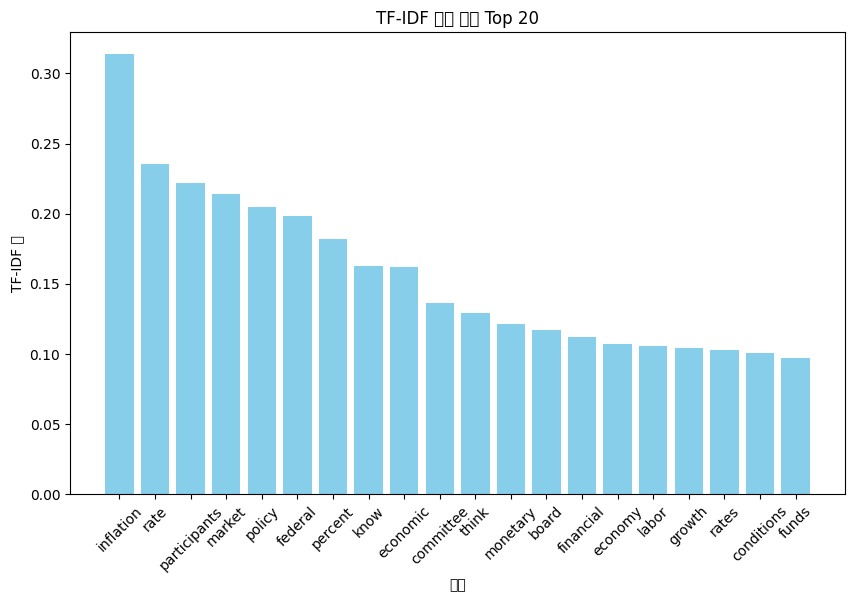

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# TF-IDF를 사용하여 중요한 단어 식별
corpus = [" ".join(filtered_text)]  # 리스트로 만들어야 함
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus)

# 각 단어에 대한 중요도 계산
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
episode_tfidf = dense.tolist()[0]

# 중요한 단어 출력
important_words = [(word, episode_tfidf[idx]) for idx, word in enumerate(feature_names)]
important_words.sort(key=lambda x: x[1], reverse=True)

print("가장 중요한 단어 20개:")
for word, tfidf_score in important_words[:20]:
    print(f"{word}: {tfidf_score}")


# 중요한 단어 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in important_words[:20]],
        [word[1] for word in important_words[:20]],
        color='skyblue')
plt.title('TF-IDF 중요 단어 Top 20')
plt.xlabel('단어')
plt.ylabel('TF-IDF 값')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54589 (\N{HANGUL SYLLABLE PIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

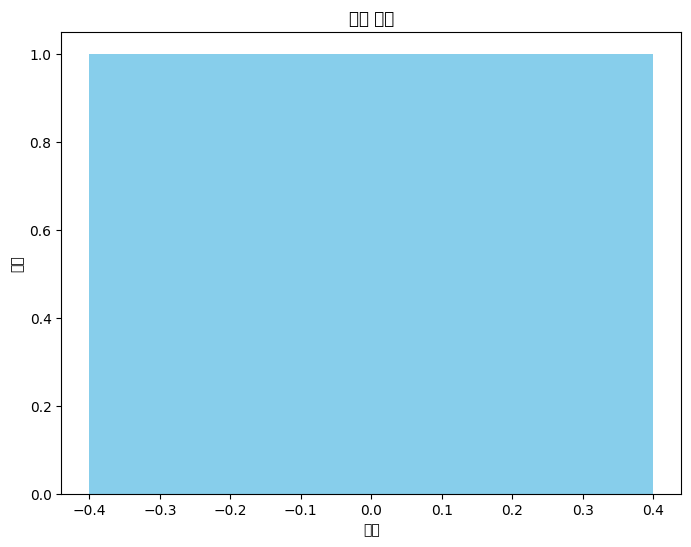

(0, '0.000*"inflation" + 0.000*"rate" + 0.000*"participants" + 0.000*"percent" + 0.000*"market" + 0.000*"federal" + 0.000*"know" + 0.000*"policy" + 0.000*"economic" + 0.000*"monetary"')
(1, '0.012*"inflation" + 0.009*"rate" + 0.009*"participants" + 0.008*"market" + 0.008*"policy" + 0.008*"federal" + 0.007*"percent" + 0.006*"know" + 0.006*"economic" + 0.005*"committee"')
(2, '0.000*"inflation" + 0.000*"participants" + 0.000*"rate" + 0.000*"policy" + 0.000*"federal" + 0.000*"percent" + 0.000*"know" + 0.000*"market" + 0.000*"financial" + 0.000*"think"')
(3, '0.000*"inflation" + 0.000*"participants" + 0.000*"rate" + 0.000*"percent" + 0.000*"economic" + 0.000*"market" + 0.000*"federal" + 0.000*"monetary" + 0.000*"policy" + 0.000*"board"')
(4, '0.000*"inflation" + 0.000*"participants" + 0.000*"rate" + 0.000*"federal" + 0.000*"market" + 0.000*"percent" + 0.000*"policy" + 0.000*"committee" + 0.000*"economic" + 0.000*"think"')
(5, '0.000*"inflation" + 0.000*"market" + 0.000*"participants" + 0.0

In [45]:
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel
import matplotlib.pyplot as plt  # 이 줄을 추가하세요

# LDA 모델
dictionary = corpora.Dictionary([filtered_text])
corpus_lda = [dictionary.doc2bow(text) for text in [filtered_text]]
lda_model = LdaModel(corpus_lda, num_topics=10, id2word=dictionary, passes=30)

# 토픽 분포 확인
document_topics = lda_model.get_document_topics(corpus_lda[0])
topic_distribution = [item[1] for item in document_topics]

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(range(len(topic_distribution)), topic_distribution, color='skyblue')
plt.title('토픽 분포')
plt.xlabel('토픽')
plt.ylabel('확률')
plt.show()

# 토픽에 속한 단어 출력
topics = lda_model.print_topics(num_words=10)  # 각 토픽마다 상위 10개의 단어를 출력
for topic in topics:
    print(topic)